I choose this dataset because it is a little bit close with insurance cases. If you read about the description's dataset you will see only 22 columns. Actually this dataset contains 150 columns, and reduce until 22 column with automated selection approach.

I will explain a little, this dataset is a research from Moro et al about success or failure a telemarketing calls for sell their bank long-term deposits. The data collected from 2008 until 2013, with data train from 2008 until june 2012 and data test from june 2012 until june 2013. Their using semi-automatic feature selection to explore the best modeling. Why they call 'semi-automated'? because some step their using another way with bussiness intuitive knowledge using 14 question for expert judgement. If we don't have expert judgement to select the feature, we can use 14 question to group the importance of parameter. Or maybe, we can use this paper as reference for feature selection. 
So, they use 4 Data Mining models, Logistic Regression (LR), Decision Tree (DT), Neural Network (NN), and Support Vector Machine (SVM). They use 2 metrics approach, area of the receiver operating characteristic curve (AUC) and area of the LIFT cumulative curve (ALIFT) to evaluate the best model with the best parameters. And NN presented the best result.

In this experiment, let say, i just repeat their research, not to find anything new. this dataset already clean and don't need data pre-processing.

In [1]:
#import library
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb

In [2]:
df = pd.read_csv("../input/bank-additional.csv") 
# Replacing chars with numbers
numeric_data = df
label = LabelEncoder()
dicts = {}

X = [
                   'age', 'job', 'marital',
                   'education', 'default', 'housing',
                   'loan','contact',
                   'month','day_of_week','duration', 'campaign',
                   'pdays','previous',
                   'poutcome', 'emp.var.rate',
                   'cons.price.idx', 'cons.conf.idx',
                   'euribor3m', 'nr.employed'
]

fields = X
fields.append('y')


for f in fields:
    label.fit(df[f].drop_duplicates())
    dicts[f] = list(label.classes_)
    numeric_data[f] = label.transform(df[f])    

target = numeric_data['y']
numeric_data = numeric_data.drop(['y'], axis=1)     

# Looking for most valuable columns in our dataset
# k-value affect auc final score and roc curve
numeric_data_best = SelectKBest(f_classif, k=7).fit_transform(numeric_data, target)

#looking for null data
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [3]:
# comparing best model
model_lr = LogisticRegression(penalty='l1', tol=0.01) 
model_dt = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
model_svc = svm.SVC() 
model_svc = SVC(kernel='rbf', random_state=0)
model_bnn = MLPClassifier()

ROCtrainTRN, ROCtestTRN, ROCtrainTRG, ROCtestTRG = model_selection.train_test_split(numeric_data_best, target, test_size=0.3) 

results = {}
kfold = 10

results['LogisticRegression_best_params'] = model_selection.cross_val_score(model_lr, numeric_data_best, target, cv = kfold).mean()
results['DecisionTree_best_params'] = model_selection.cross_val_score(model_dt, numeric_data_best, target, cv = kfold).mean()
results['SVC_best_params'] = model_selection.cross_val_score(model_svc, numeric_data_best, target, cv = kfold).mean()
results['NN_best_params'] = model_selection.cross_val_score(model_bnn, numeric_data_best, target, cv = kfold).mean()

results['LogisticRegression_all_params'] = model_selection.cross_val_score(model_lr, numeric_data, target, cv = kfold).mean()
results['DecisionTree_all_params'] = model_selection.cross_val_score(model_dt, numeric_data, target, cv = kfold).mean()
results['SVC_all_params'] = model_selection.cross_val_score(model_svc, numeric_data, target, cv = kfold).mean()
results['NN_all_params'] = model_selection.cross_val_score(model_bnn, numeric_data, target, cv = kfold).mean()    


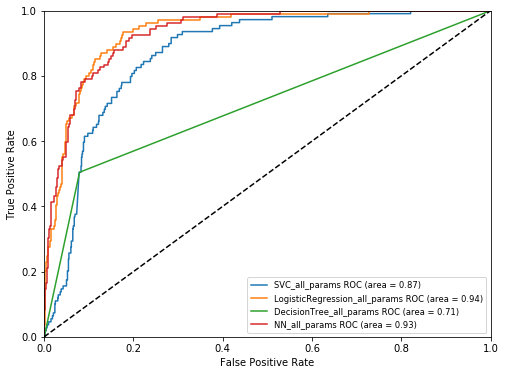

In [4]:
# ROC with all parameters
roc_train_all, roc_test_all, roc_train_all_class, roc_test_all_class = model_selection.train_test_split(numeric_data, target, test_size=0.25) 
roc_train_best, roc_test_best, roc_train_best_class, roc_test_best_class = model_selection.train_test_split(numeric_data_best, target, test_size=0.25) 

models = [
    {
        'label' : 'SVC_all_params',
        'model': model_svc,
        'roc_train': roc_train_all,
        'roc_test': roc_test_all,
        'roc_train_class': roc_train_all_class,        
        'roc_test_class': roc_test_all_class,        
    },        
    {
        'label' : 'LogisticRegression_all_params',
        'model': model_lr,
        'roc_train': roc_train_all,
        'roc_test': roc_test_all,
        'roc_train_class': roc_train_all_class,        
        'roc_test_class': roc_test_all_class,        
    },
    {
        'label' : 'DecisionTree_all_params',
        'model': model_dt,
        'roc_train': roc_train_all,
        'roc_test': roc_test_all,
        'roc_train_class': roc_train_all_class,        
        'roc_test_class': roc_test_all_class,        
    },
    {
        'label' : 'NN_all_params',
        'model': model_bnn,
        'roc_train': roc_train_all,
        'roc_test': roc_test_all,
        'roc_train_class': roc_train_all_class,        
        'roc_test_class': roc_test_all_class,        
    }
]


plt.clf()
plt.figure(figsize=(8,6))

for m in models:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

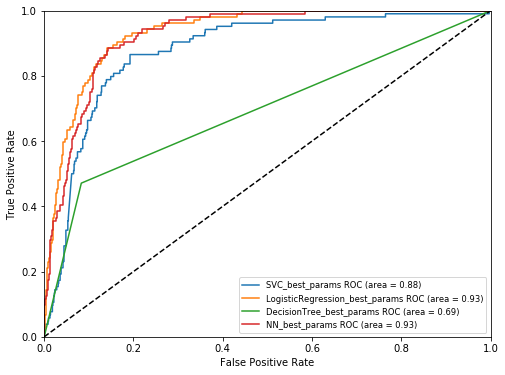

In [5]:
# ROC with best parameters
roc_train_all, roc_test_all, roc_train_all_class, roc_test_all_class = model_selection.train_test_split(numeric_data, target, test_size=0.25) 
roc_train_best, roc_test_best, roc_train_best_class, roc_test_best_class = model_selection.train_test_split(numeric_data_best, target, test_size=0.25) 

models = [
    {
        'label' : 'SVC_best_params',
        'model': model_svc,
        'roc_train': roc_train_best,
        'roc_test': roc_test_best,
        'roc_train_class': roc_train_best_class,        
        'roc_test_class': roc_test_best_class,        
    },        
    {
        'label' : 'LogisticRegression_best_params',
        'model': model_lr,
        'roc_train': roc_train_best,
        'roc_test': roc_test_best,
        'roc_train_class': roc_train_best_class,        
        'roc_test_class': roc_test_best_class,        
    },
    {
        'label' : 'DecisionTree_best_params',
        'model': model_dt,
        'roc_train': roc_train_best,
        'roc_test': roc_test_best,
        'roc_train_class': roc_train_best_class,        
        'roc_test_class': roc_test_best_class,        
    },
    {
        'label' : 'NN_best_params',
        'model': model_bnn,
        'roc_train': roc_train_best,
        'roc_test': roc_test_best,
        'roc_train_class': roc_train_best_class,        
        'roc_test_class': roc_test_best_class,        
    }
]


plt.clf()
plt.figure(figsize=(8,6))

for m in models:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

 If we see the curve, beside auc score, we can see the chart, the best model is with low False Positive Rate (FPR) and High True Positive Rate (TPR) example using all parameters, there is red line which is Neural Network and using best parameters, there is orange line which is Logistic Regression. In actual research, the best model with highest score using neural network. But, curve with best parameters above show that LR have highest score. Remember that actual research have 150 parameters with different column reduce each model and this experiment just have 22 parameters and reduce again. So, its possible have different result with actual research.
Now, lets check the feature importance below.

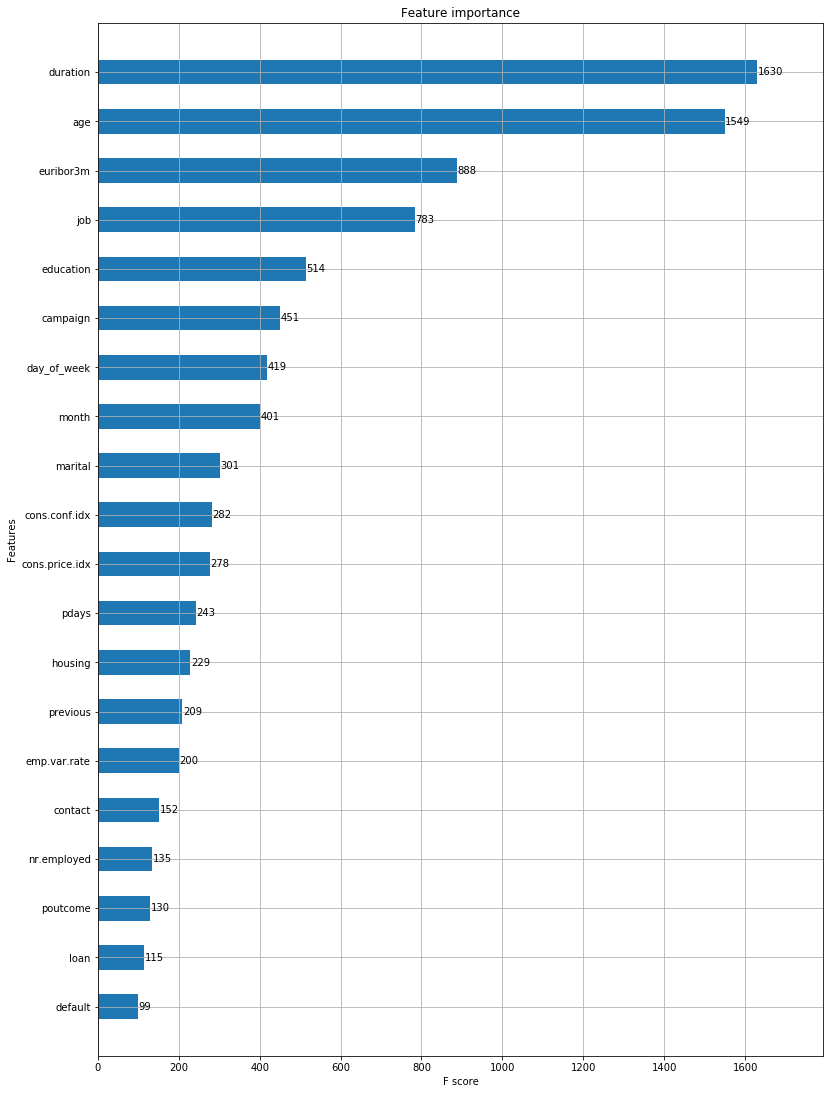

In [6]:
#i like this xgboost library XD
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(numeric_data,target,feature_names = numeric_data.columns.values)
model = xgb.train(dict(xgb_params,silent=0),dtrain,num_boost_round=100)

fig,ax=plt.subplots(figsize = (13,19))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)
plt.show()

In actual research, 'duration', 'age', and 'euribor3m' have highest importance score like plot above. And one of the importance variable is 3 month euribor rate which is uncontrolled by the commercial bank. This shows us that sometime customers have some  consideration to decide for example social economic factor, you can check the group of the parameters in Moro et al paper. 

My own conclution, there are some step must do before we decide to make a prediction model. First, make sure what should we read before, i found so many paper with marketing analysis with different purpose. Second, usually company have more than one table contains company transaction, make sure we merge the data first. Third, clean data. There are so many preprocess ways to clean and make sure the data good enough for modeling, make sure we understand each attribute meaning, but in another case if we have a hundred feature, we must do automated selection featured. And last, compare each machine learning model, but make sure we know type of each model. **So, i suggest the important step are preprocessing and feature selection.**

Besides above telemarketing example, there is another way, assosiation rule mining. If we have an  example case, like insurance case. We want to know which customers will introduce our company product to their friend from their activity's transaction.  Assosiation rule mining can measure customer behavioral score. ex : if sex = female, operation_way = call, age = 30, this customer have potensial to introduce company's insurance (You know that women in middle-age usually like gossip and tend to tell about her entire life include her insurance company), and if sex=male, operation_way = email, age = 25, this customer have little potensial to introduce company's insurance, and etc. This ARM method determine the rule with confidence and minimum support score. This model consider each local parameters that sometime skipped in another model.

But, actually there are many ways to make a model for CRM. You can check "Application of data mining techniques in customer relationship management: A literature review and classification" by Ngai et al.